# Is it a CAT or a DOG ?

In [4]:
"""
Created on Tue Mar 20 22:14:54 2018

@author: atul
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image as image_utils
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import glob
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from matplotlib.pyplot import figure, imshow, axis

### Loading the already trained classifier model to save time.

In [3]:
# load json and create model
json_file = open('model_c_v_d.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
classifier = model_from_json(loaded_model_json)
# load weights into new model
classifier.load_weights("model_c_v_d.h5")
print("Loaded model from disk")

Loaded model from disk


### Making the Architecture or CNN
#### - 2 Convolutional Layers
#### - 2 Pooling Layers
#### - 1 Flattened layer
#### - 4 Hidden Layer
#### - 1 Output Layer

In [ ]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 16, activation = 'relu'))
classifier.add(Dense(units = 8, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))
#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
__________

### Fitting the model with the train and test datasets

In [3]:
#Part 2 - Fitting the CNN in the images
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.4,
        zoom_range = 0.4,
        horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory('dataset/training_set',
                                                target_size = (128, 128),
                                                batch_size = 32,
                                                class_mode = 'binary')
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                              target_size = (128, 128),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
classifier.fit_generator(
        train_set,
        steps_per_epoch = (8000/32),
        epochs = 20,
        validation_data = test_set,
        validation_steps = (2000/32))

Epoch 1/20
250/250 [==============================] - 69s 277ms/step - loss: 0.3718 - acc: 0.8281 - val_loss: 0.4329 - val_acc: 0.8280
Epoch 2/20
250/250 [==============================] - 68s 273ms/step - loss: 0.3624 - acc: 0.8382 - val_loss: 0.4530 - val_acc: 0.8060
Epoch 3/20
250/250 [==============================] - 77s 306ms/step - loss: 0.3516 - acc: 0.8452 - val_loss: 0.4368 - val_acc: 0.8085
Epoch 4/20
250/250 [==============================] - 72s 288ms/step - loss: 0.3414 - acc: 0.8486 - val_loss: 0.4445 - val_acc: 0.8220
Epoch 5/20
250/250 [==============================] - 77s 308ms/step - loss: 0.3419 - acc: 0.8481 - val_loss: 0.4364 - val_acc: 0.8130
Epoch 6/20
250/250 [==============================] - 71s 282ms/step - loss: 0.3324 - acc: 0.8554 - val_loss: 0.4320 - val_acc: 0.8195
Epoch 7/20
250/250 [==============================] - 70s 282ms/step - loss: 0.3181 - acc: 0.8609 - val_loss: 0.4432 - val_acc: 0.8140
Epoch 8/20
250/250 [==============================] - 7

#### As we can se above the accuracy on training dataset is 0.891 and on test dataset it is 0.8255 

### Predicting on new dataset

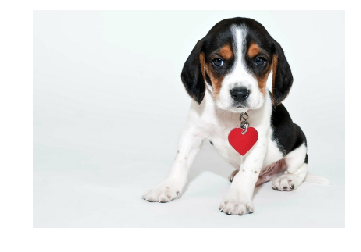

/home/atul/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


		 PREDICTED:   DOG


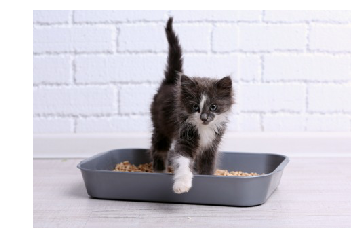

		 PREDICTED:   CAT


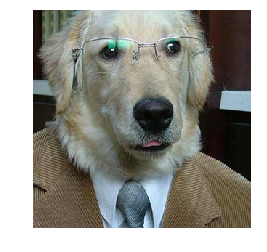

		 PREDICTED:   DOG


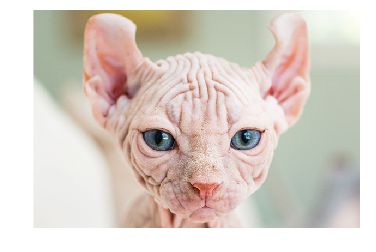

		 PREDICTED:   DOG


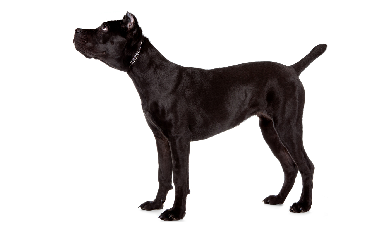

		 PREDICTED:   CAT


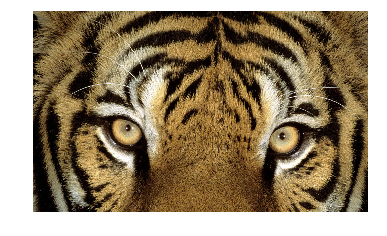

		 PREDICTED:   DOG


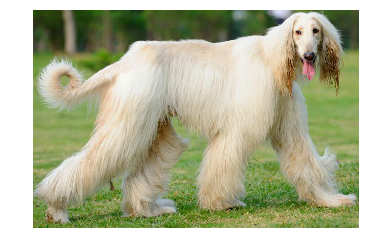

		 PREDICTED:   DOG


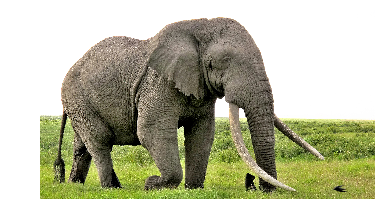

		 PREDICTED:   DOG


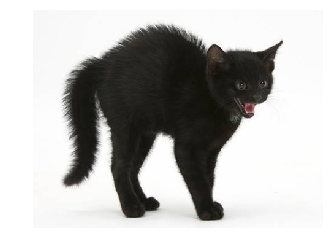

		 PREDICTED:   CAT


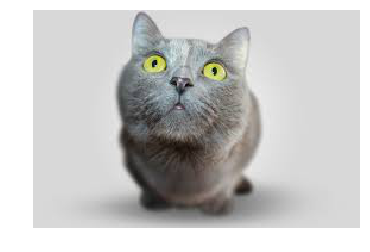

		 PREDICTED:   CAT


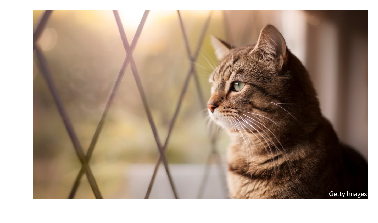

		 PREDICTED:   CAT


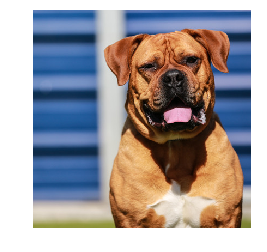

		 PREDICTED:   DOG


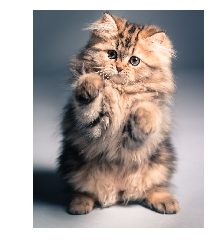

		 PREDICTED:   CAT


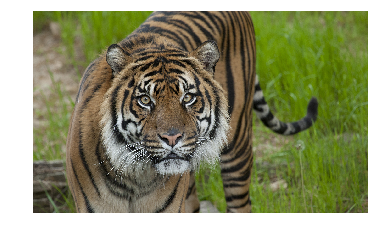

		 PREDICTED:   DOG


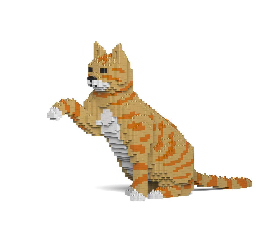

		 PREDICTED:   CAT


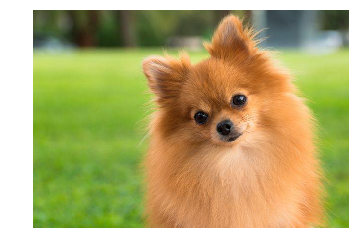

		 PREDICTED:   DOG


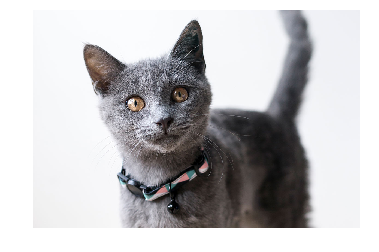

		 PREDICTED:   CAT


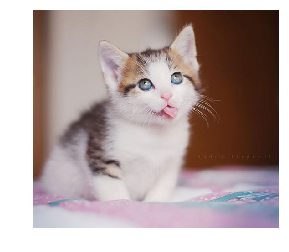

		 PREDICTED:   CAT


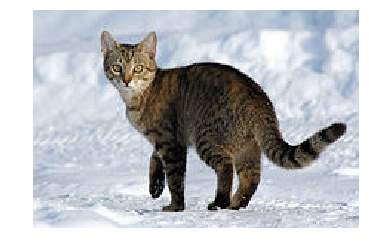

		 PREDICTED:   CAT


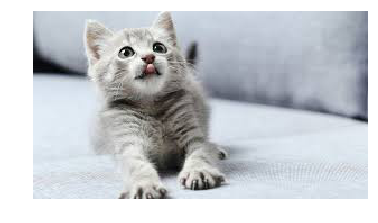

		 PREDICTED:   DOG


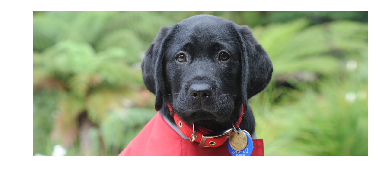

		 PREDICTED:   DOG


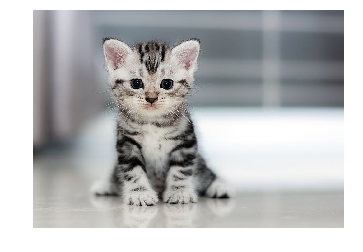

		 PREDICTED:   DOG


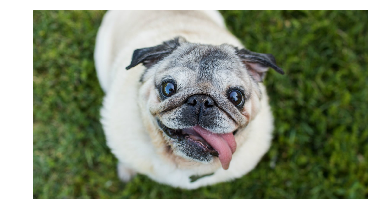

		 PREDICTED:   DOG


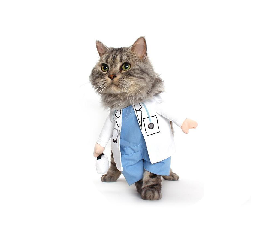

		 PREDICTED:   DOG


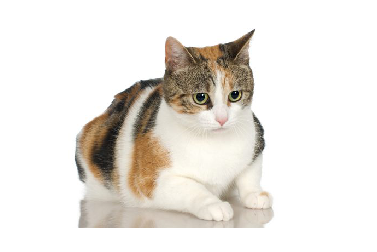

		 PREDICTED:   CAT


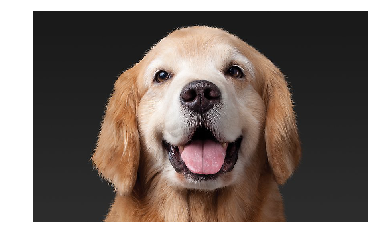

		 PREDICTED:   DOG


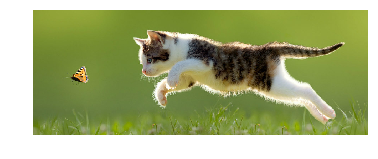

		 PREDICTED:   DOG


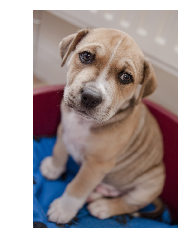

		 PREDICTED:   DOG


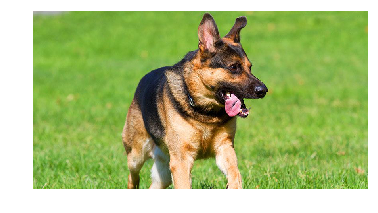

		 PREDICTED:   DOG


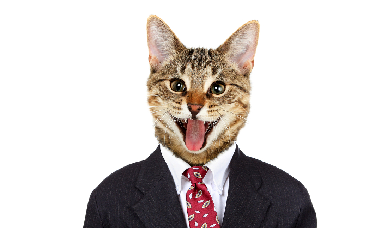

		 PREDICTED:   CAT


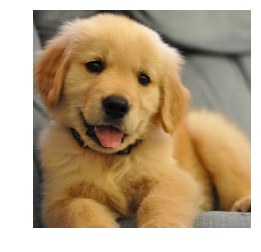

		 PREDICTED:   DOG


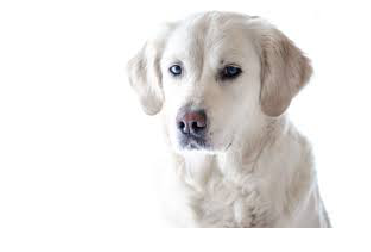

		 PREDICTED:   DOG


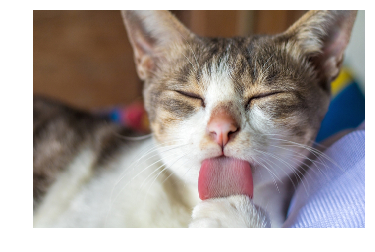

		 PREDICTED:   CAT


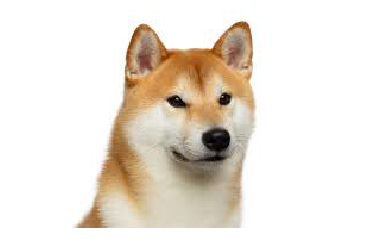

		 PREDICTED:   DOG


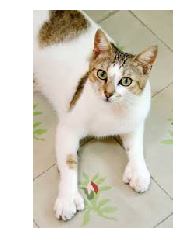

		 PREDICTED:   DOG


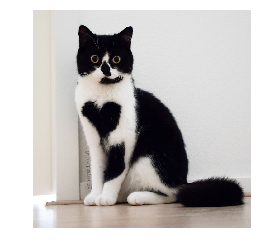

		 PREDICTED:   CAT


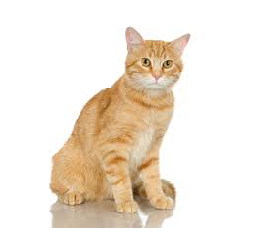

		 PREDICTED:   CAT


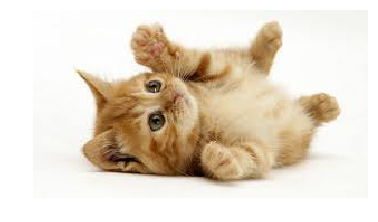

		 PREDICTED:   CAT


38

In [6]:
image_list = []
prediction = []
i = 0
for filename in glob.glob('/home/atul/Desktop/img/*'): 
    #im = Image.open(filename)
    #print(filename, '->', end = ' ')
    img = mpimg.imread(filename)
    plt.imshow(img)
    axis('off')
    #plt.subplot(14, 3 , 3)
    plt.show()
    
    img = imread(filename) #make sure that path_to_file contains the path to the image you want to predict on. 
    img = resize(img,(128, 128))
    img = np.expand_dims(img,axis=0)
    print('\t\t PREDICTED:  ', end = ' ')
    if(np.max(img)>1):
        img = img/255.0

    prediction = classifier.predict_classes(img)

    if(prediction):
        print ("DOG")
    else:
        print ("CAT")
        #image_list.append(im)
    i += 1;
    
i

### Saving the classifier into a json file with its weights along with it

In [12]:
# serialize model to JSON
model_json = classifier.to_json()
with open("model_c_v_d.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model_c_v_d.h5")
print("Saved model to disk") 

Saved model to disk


### Checking the accuracy on this new dataset manually

In [10]:
(35-7)/35

0.8